In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('dados_temperatura_umidade.csv', sep=";")
df.head()


,TEMPERATURA_MEDIA,UMIDADE_MEDIA,FOSFORO,POTASSIO,BOMBAS_LIGADAS
0,"22,6","73,8",1,1,1
1,"23,5",67,0,0,1
2,"23,1","69,3",1,0,1
3,"21,1",80,1,1,0
4,"17,2","91,8",0,1,0


<Axes: >

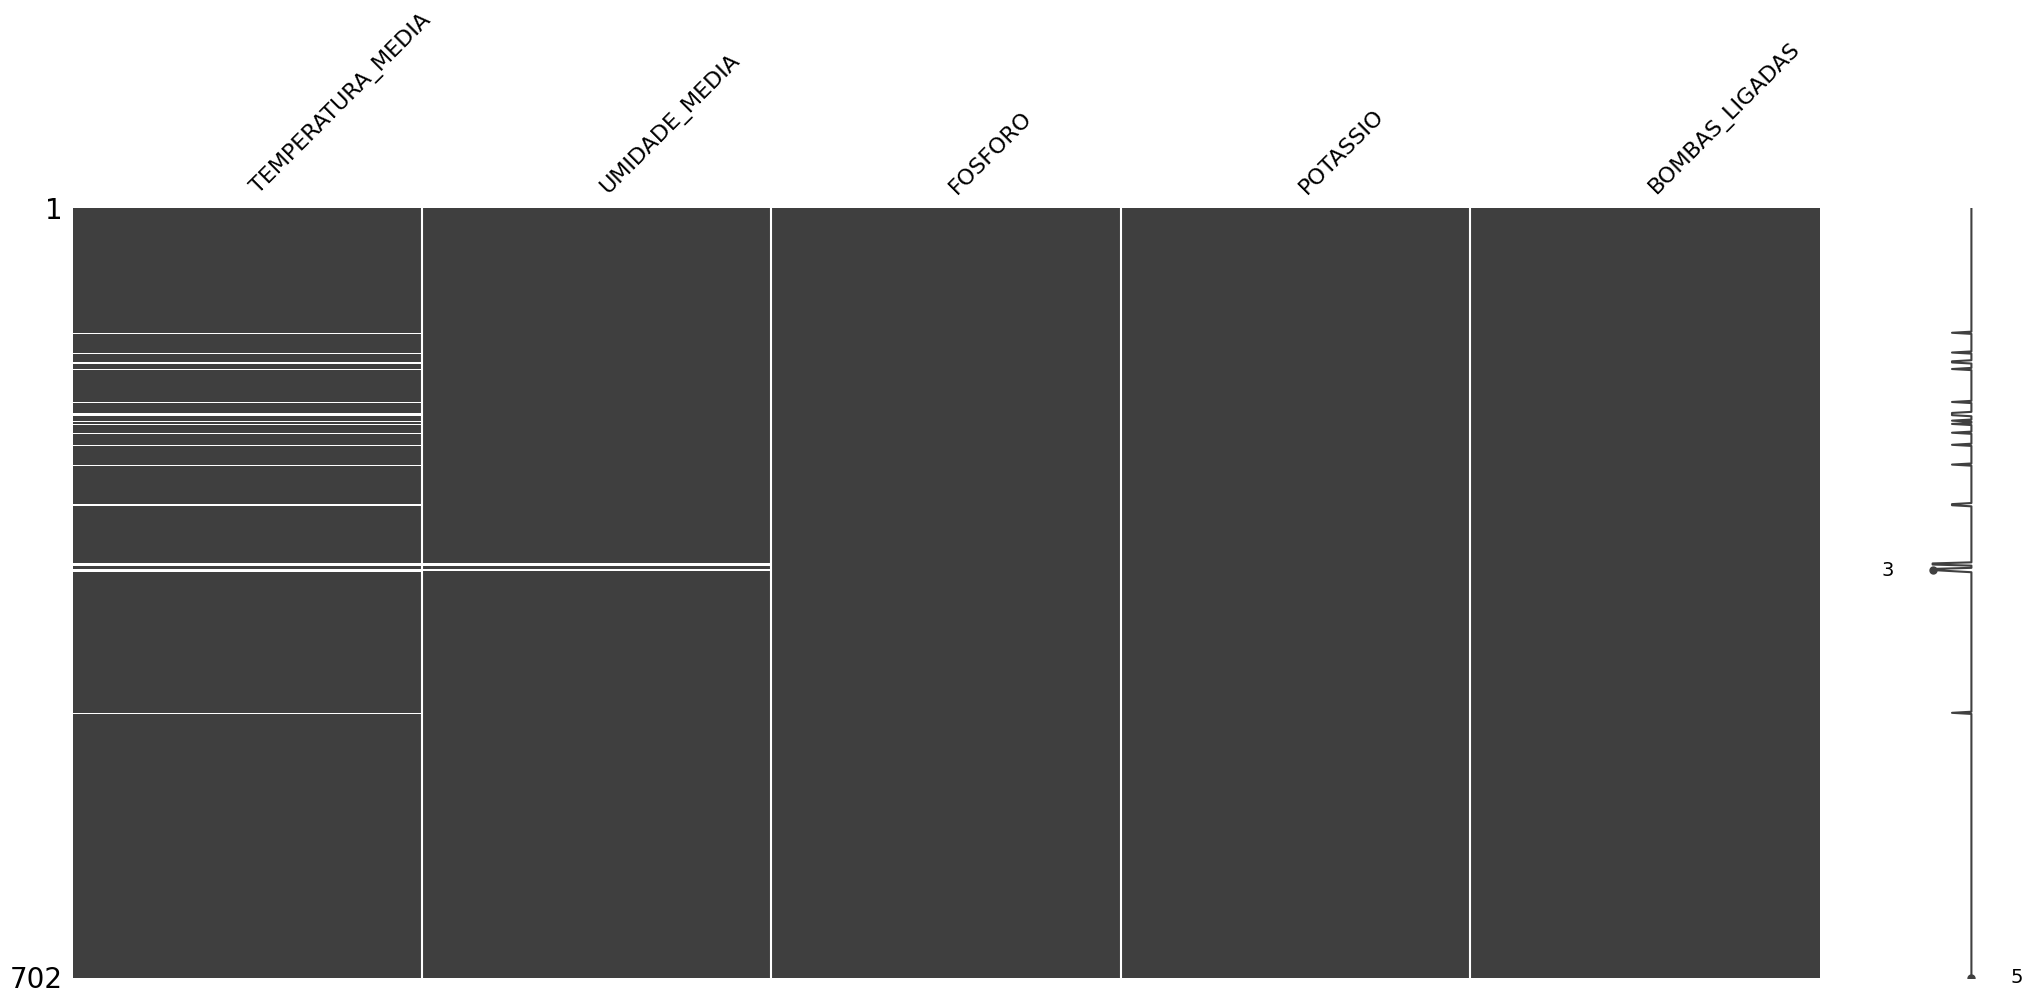

In [ ]:
import missingno as msno
msno.matrix(df)

<Axes: >

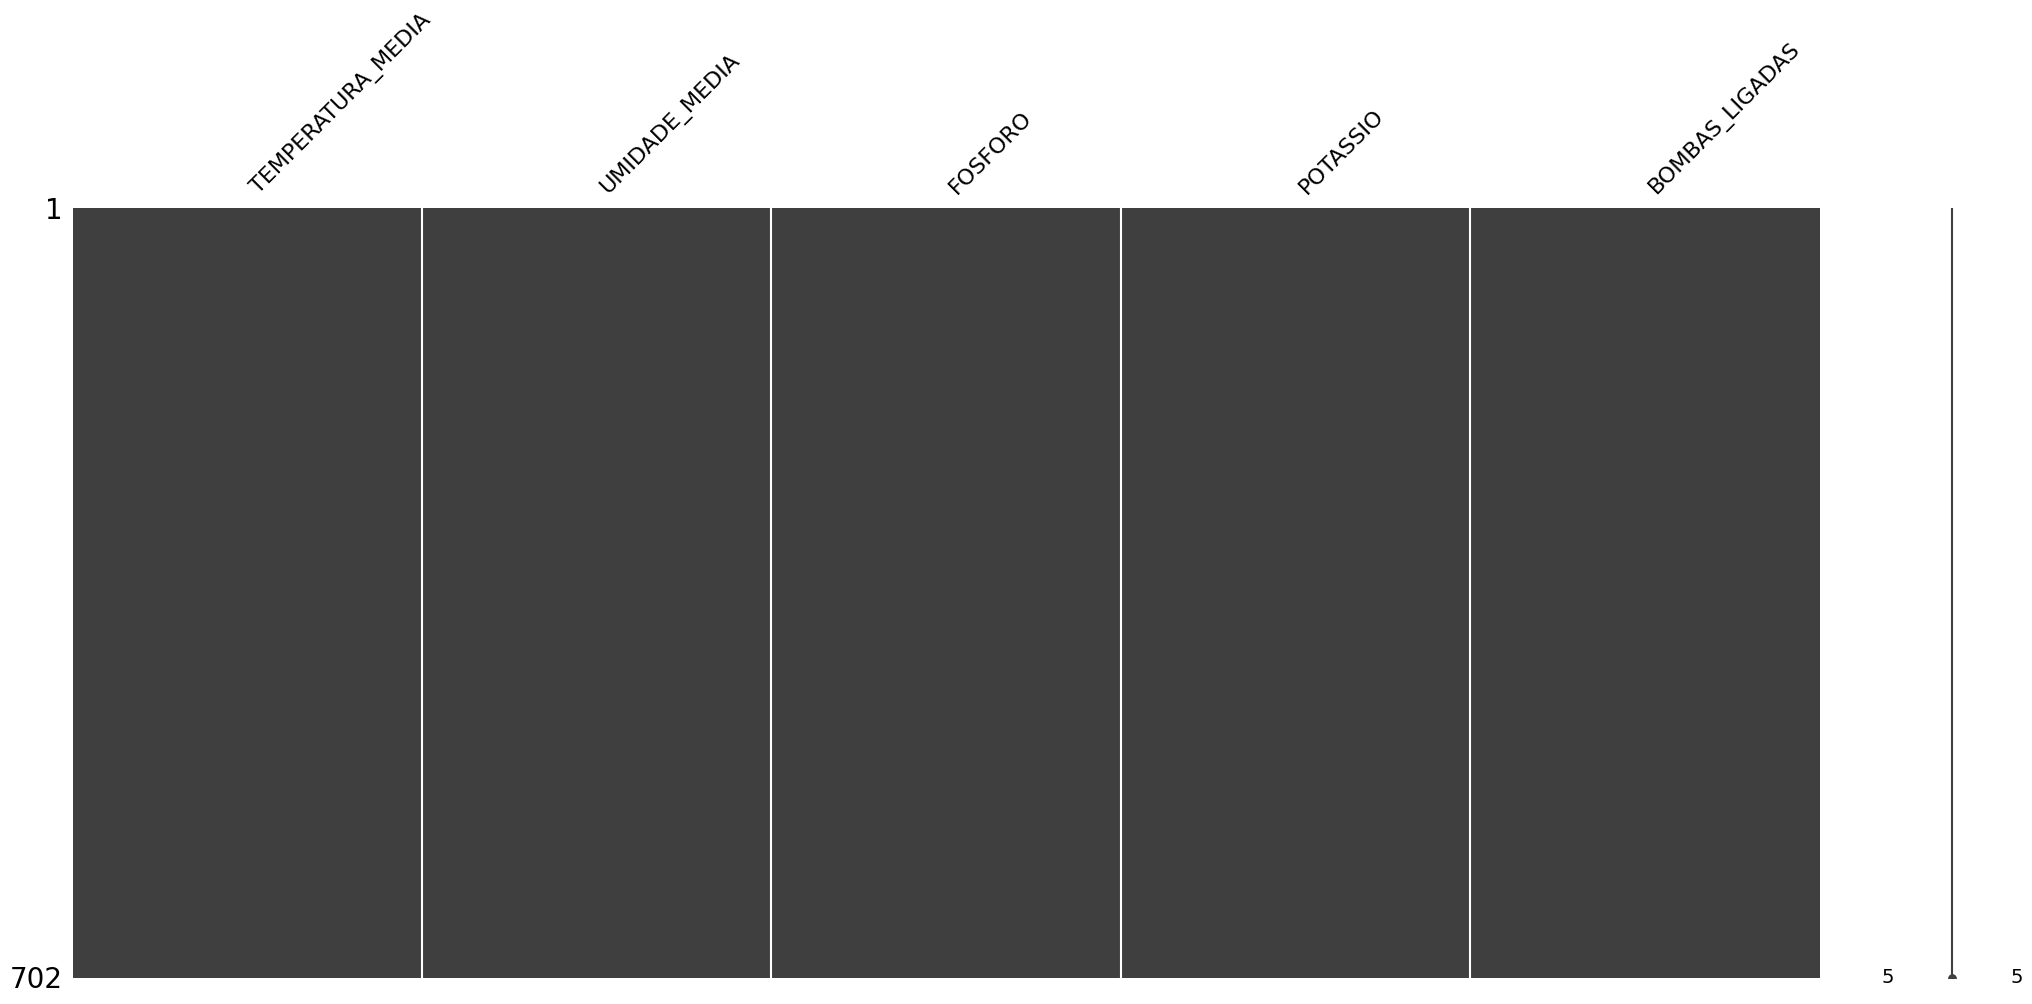

In [ ]:
df = df.ffill()
msno.matrix(df)

In [ ]:
df['TEMPERATURA_MEDIA'] = df['TEMPERATURA_MEDIA'].str.replace(',', '.').astype(float)
df['UMIDADE_MEDIA'] = df['UMIDADE_MEDIA'].str.replace(',', '.').astype(float)

In [ ]:
X = df.drop('BOMBAS_LIGADAS', axis=1)
y = df['BOMBAS_LIGADAS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df.head()

,TEMPERATURA_MEDIA,UMIDADE_MEDIA,FOSFORO,POTASSIO,BOMBAS_LIGADAS
0,22.6,73.8,1,1,1
1,23.5,67.0,0,0,1
2,23.1,69.3,1,0,1
3,21.1,80.0,1,1,0
4,17.2,91.8,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
# Aplicando StandardScaler
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X)
# Aplicando MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)
# Mostrando as primeiras linhas dos dados escalados
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()
df_minmax = pd.DataFrame(X_minmax_scaled, columns=X.columns)
df_minmax.head()

,TEMPERATURA_MEDIA,UMIDADE_MEDIA,FOSFORO,POTASSIO
0,0.587940,0.698609,1.0,1.0
1,0.633166,0.593509,0.0,0.0
2,0.613065,0.629057,1.0,0.0
3,0.512563,0.794436,1.0,1.0
4,0.316583,0.976816,0.0,1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, DBSCAN

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

# Testando diferentes algoritmos de classificação
# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
accuracy_rf = model_rf.score(X_test, y_test)
print(f"Acurácia com Random Forest: {accuracy_rf:.2f}")
# SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)
accuracy_svm = model_svm.score(X_test, y_test)
print(f"Acurácia com SVM: {accuracy_svm:.2f}")
# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
accuracy_knn = model_knn.score(X_test, y_test)
print(f"Acurácia com KNN: {accuracy_knn:.2f}")

#modelo Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
accuracy_nb = model_nb.score(X_test, y_test)
print(f"Acurácia com Naive Bayes: {accuracy_nb:.2f}")

#modelo de Regressão Logística
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
accuracy_lr = model_lr.score(X_test, y_test)
print(f"Acurácia com Regressão Logística: {accuracy_lr:.2f}")

Acurácia com Random Forest: 0.97
Acurácia com SVM: 0.88
Acurácia com KNN: 0.95
Acurácia com Naive Bayes: 0.92
Acurácia com Regressão Logística: 0.92


In [ ]:
# Importando todas as métricas necessárias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculando e exibindo a Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
# Calculando e exibindo a Precisão
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precisão (Weighted): {precision:.2f}")
# Calculando e exibindo o Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall (Weighted): {recall:.2f}")
# Calculando e exibindo o F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (Weighted): {f1:.2f}")
# Calculando e exibindo a Matriz de Confusão
matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matrix)

Acurácia: 0.95
Precisão (Weighted): 0.95
Recall (Weighted): 0.95
F1-Score (Weighted): 0.95
Matriz de Confusão:
[[109   3]
 [  8  91]]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
# Calculando as métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Exibindo as métricas
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Média do Erro Absoluto (MAE): {mae:.2f}")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Quadrático Médio (MSE): 0.05
Raiz do Erro Quadrático Médio (RMSE): 0.23
Média do Erro Absoluto (MAE): 0.05
Erro Percentual Médio Absoluto (MAPE): 64032222190101.88
Coeficiente de Determinação (R²): 0.79
